In [2]:
# %pip install ucimlrepo
# %pip install -U scikit-learn
# %pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

In [5]:
# print the shape of the data
print(X.shape, y.shape)
print(X.keys())
print(y.keys())

(150, 4) (150, 1)
Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
Index(['class'], dtype='object')


In [6]:
iris.data.features.keys()

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [7]:
# turn into np arrays
X = np.array(X)
y = np.array(y)

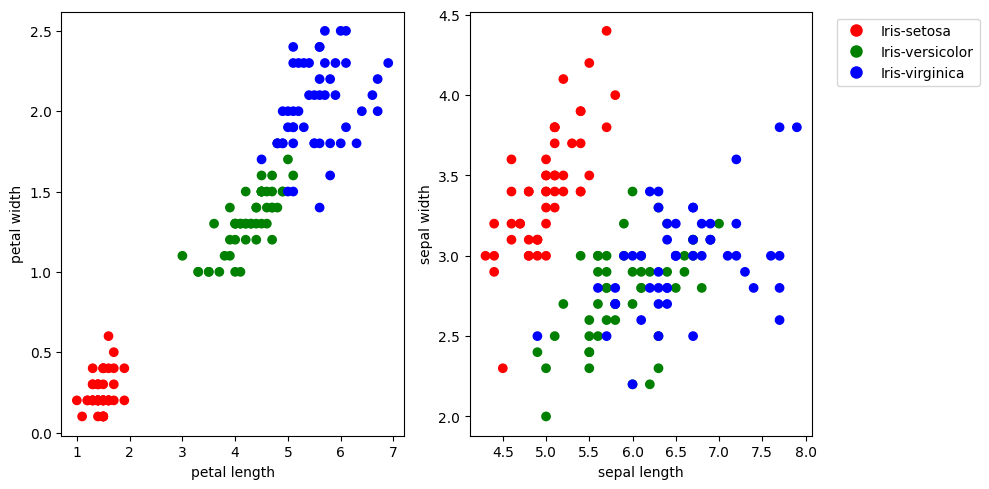

In [8]:
colors = ['r', 'g', 'b']
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color_list = ['r' if y_i == 'Iris-setosa' else 'g' if y_i == 'Iris-versicolor' else 'b' for y_i in y]

# Plot the data for each pair of features
plt.figure(figsize=(10, 5))

# Petal features
plt.subplot(1, 2, 1)
plt.scatter(X[:, 2], X[:, 3], c=color_list)
plt.xlabel(iris.data.features.keys()[2])
plt.ylabel(iris.data.features.keys()[3])

# Sepal features
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=color_list)
plt.xlabel(iris.data.features.keys()[0])
plt.ylabel(iris.data.features.keys()[1])

# Add a single legend for both plots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=target_name) 
           for color, target_name in zip(colors, target_names)]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
le.classes_

c:\Users\nicte\Desktop\ML Projects\Iris-Classification\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

In [16]:
# linear regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
accuracy = model_lr.score(X_test, y_test)
print(accuracy)

0.9003212607760909


In [17]:
# 10 fold CV
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lr, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.16 accuracy with a standard deviation of 0.32


In [18]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model_lgr = LogisticRegression()
model_lgr.fit(X_train, y_train)
y_pred = model_lgr.predict(X_test)
accuracy = model_lgr.score(X_test, y_test)
print(accuracy)

0.9736842105263158


In [20]:
# 10 fold CV
scores = cross_val_score(model_lgr, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.03


c:\Users\nicte\Desktop\ML Projects\Iris-Classification\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
